<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n250.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.313457,93.550777,0.658325,126.522559,125.821351,0.701208
1,0.0,1.0,89.303435,65.283421,1.029284,165.616141,164.553763,1.062378
2,0.0,2.0,66.475277,56.739075,-0.042932,133.171420,133.155933,0.015487
3,0.0,3.0,51.951737,90.608588,-0.009486,152.550840,152.533344,0.017496
4,0.0,4.0,57.402718,45.406654,-0.009150,112.800222,112.731287,0.068935
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,78.329539,91.691813,0.634781,180.656133,179.912645,0.743488
29996,999.0,26.0,42.971080,64.482896,1.161677,118.615654,117.493395,1.122258
29997,999.0,27.0,45.921618,32.955792,-0.181781,88.695629,88.607787,0.087842
29998,999.0,28.0,36.894731,38.449575,-0.681029,84.663277,85.221700,-0.558423


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.313457  93.550777  0.658325  126.522559  125.821351  0.701208
      1.0    89.303435  65.283421  1.029284  165.616141  164.553763  1.062378
      2.0    66.475277  56.739075 -0.042932  133.171420  133.155933  0.015487
      3.0    51.951737  90.608588 -0.009486  152.550840  152.533344  0.017496
      4.0    57.402718  45.406654 -0.009150  112.800222  112.731287  0.068935
...                ...        ...       ...         ...         ...       ...
999.0 25.0   78.329539  91.691813  0.634781  180.656133  179.912645  0.743488
      26.0   42.971080  64.482896  1.161677  118.615654  117.493395  1.122258
      27.0   45.921618  32.955792 -0.181781   88.695629   88.607787  0.087842
      28.0   36.894731  38.449575 -0.681029   84.663277   85.221700 -0.558423
      29.0   86.897554  93.636486 -0.153951  190.380089  190.348633  0.031456

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.313457  93.550777  0.658325  126.522559  125.821351  0.701208
      1.0    89.303435  65.283421  1.029284  165.616141  164.553763  1.062378
      2.0    66.475277  56.739075 -0.042932  133.171420  133.155933  0.015487
      3.0    51.951737  90.608588 -0.009486  152.550840  152.533344  0.017496
      4.0    57.402718  45.406654 -0.009150  112.800222  112.731287  0.068935
...                ...        ...       ...         ...         ...       ...
999.0 25.0   78.329539  91.691813  0.634781  180.656133  179.912645  0.743488
      26.0   42.971080  64.482896  1.161677  118.615654  117.493395  1.122258
      27.0   45.921618  32.955792 -0.181781   88.695629   88.607787  0.087842
      28.0   36.894731  38.449575 -0.681029   84.663277   85.221700 -0.558423
      29.0   86.897554  93.636486 -0.153951  190.380089  190.348633  0.031456

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.313457,93.550777,0.658325,126.522559,125.821351,0.701208
1,0.0,1.0,89.303435,65.283421,1.029284,165.616141,164.553763,1.062378
2,0.0,2.0,66.475277,56.739075,-0.042932,133.171420,133.155933,0.015487
3,0.0,3.0,51.951737,90.608588,-0.009486,152.550840,152.533344,0.017496
4,0.0,4.0,57.402718,45.406654,-0.009150,112.800222,112.731287,0.068935
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,78.329539,91.691813,0.634781,180.656133,179.912645,0.743488
29996,999.0,26.0,42.971080,64.482896,1.161677,118.615654,117.493395,1.122258
29997,999.0,27.0,45.921618,32.955792,-0.181781,88.695629,88.607787,0.087842
29998,999.0,28.0,36.894731,38.449575,-0.681029,84.663277,85.221700,-0.558423


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.313457  93.550777  0.658325  126.522559  125.821351  0.701208
      1.0    89.303435  65.283421  1.029284  165.616141  164.553763  1.062378
      2.0    66.475277  56.739075 -0.042932  133.171420  133.155933  0.015487
      3.0    51.951737  90.608588 -0.009486  152.550840  152.533344  0.017496
      4.0    57.402718  45.406654 -0.009150  112.800222  112.731287  0.068935
...                ...        ...       ...         ...         ...       ...
999.0 25.0   78.329539  91.691813  0.634781  180.656133  179.912645  0.743488
      26.0   42.971080  64.482896  1.161677  118.615654  117.493395  1.122258
      27.0   45.921618  32.955792 -0.181781   88.695629   88.607787  0.087842
      28.0   36.894731  38.449575 -0.681029   84.663277   85.221700 -0.558423
      29.0   86.897554  93.636486 -0.153951  190.380089  190.348633  0.031456

[30000 rows x 6 columns]

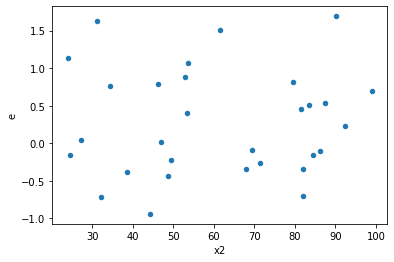

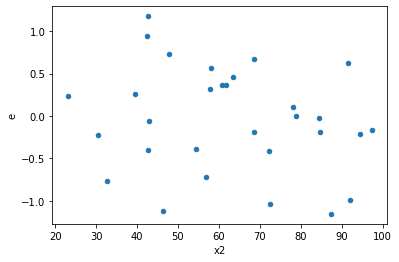

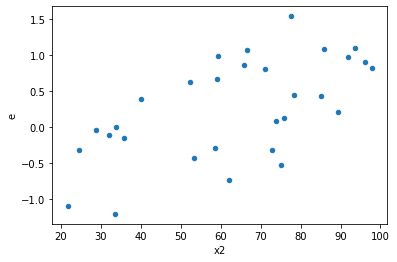

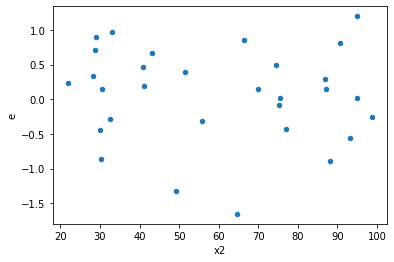

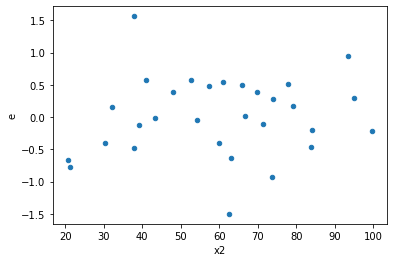

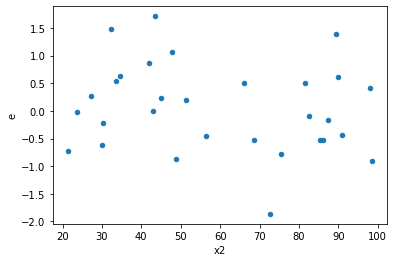

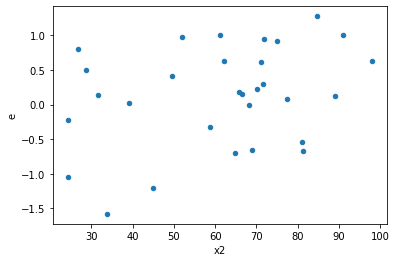

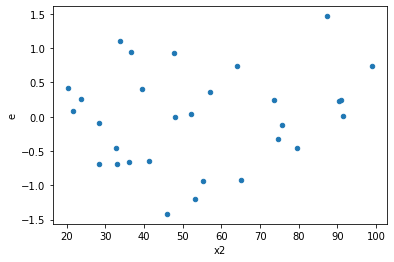

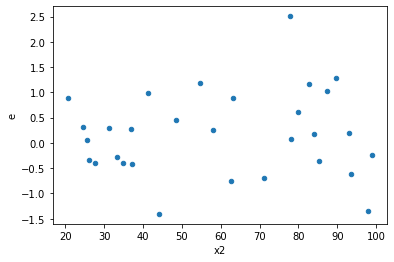

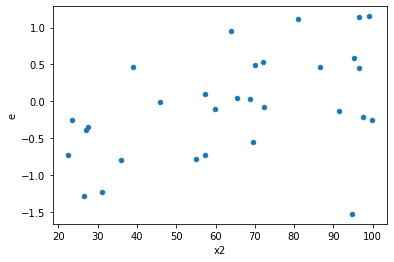

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,15.0,3.088026372379198,5.7441650832353215,0.2807296702162907,0.38294433888235474,1.3641035469721168,0.5654261572952859,0.717286921352357,0.28271307864764295,Reject005=1 : Homoscedasticity
4.0,13.0,13.0,4.568639118525748,8.825873752680147,0.3514337783481345,0.6789133655907805,1.9318386774940024,0.248326567958308,0.875836716020846,0.124163283979154,Reject005=1 : Homoscedasticity
7.0,6.0,20.0,1.2962657303645944,18.34179219606297,0.21604428839409906,0.9170896098031485,4.2449148580601745,0.012935097310903698,0.9935324513445482,0.006467548655451849,Reject005=0 : Heteroscedasticity
8.0,11.0,15.0,5.258008948905299,7.111199662600462,0.4780008135368453,0.47407997750669745,0.9917974281233192,0.9882673478339989,0.5058663260830005,0.49413367391699947,Reject005=1 : Homoscedasticity
11.0,10.0,16.0,2.782066889290477,6.378167707047018,0.2782066889290477,0.3986354816904386,1.4328752598472008,0.5028939137883794,0.7485530431058103,0.2514469568941897,Reject005=1 : Homoscedasticity
12.0,15.0,11.0,3.768899655076475,3.3622826353074284,0.25125997700509833,0.30566205775522076,1.216517096748037,0.7555212476316571,0.6222393761841715,0.37776062381582853,Reject005=1 : Homoscedasticity
22.0,13.0,13.0,3.7765094873910003,11.44995121270715,0.29050072979930774,0.88076547790055,3.031887315770347,0.055438493507645514,0.9722807532461772,0.027719246753822757,Reject005=1 : Homoscedasticity
27.0,14.0,12.0,4.556569501571491,6.027797858847927,0.3254692501122493,0.5023164882373272,1.543360818461609,0.4570605833561423,0.7714697083219288,0.22853029167807115,Reject005=1 : Homoscedasticity
29.0,13.0,13.0,7.165198979100239,7.3819079888706,0.55116915223848,0.5678390760669692,1.0302446603928888,0.957976544930927,0.5210117275345365,0.4789882724654635,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,15.0,3.088026372379198,5.7441650832353215,0.2807296702162907,0.38294433888235474,1.3641035469721168,0.5654261572952859,Reject005=1 : Homoscedasticity
1.0,16.0,10.0,12.100757892712133,3.4297827852137277,0.7562973682945083,0.34297827852137275,0.45349659128764047,0.15304770306620036,Reject005=1 : Homoscedasticity
2.0,16.0,10.0,7.8268066750677034,2.651660502207449,0.48917541719173147,0.2651660502207449,0.5420674075222662,0.2650391510785288,Reject005=1 : Homoscedasticity
3.0,18.0,8.0,4.224772570812545,1.7698995214774813,0.23470958726736363,0.22123744018468516,0.9426007806518274,0.8613711600661578,Reject005=1 : Homoscedasticity
4.0,13.0,13.0,4.568639118525748,8.825873752680147,0.3514337783481345,0.6789133655907805,1.9318386774940024,0.248326567958308,Reject005=1 : Homoscedasticity
5.0,18.0,8.0,10.581182213557714,1.5687295359370572,0.5878434563087619,0.19609119199213215,0.3335772302773346,0.05051129458404616,Reject005=1 : Homoscedasticity
6.0,14.0,12.0,6.0997841123963905,4.206602366561594,0.43569886517117073,0.35055019721346614,0.8045699110915685,0.6902636550964072,Reject005=1 : Homoscedasticity
7.0,6.0,20.0,1.2962657303645944,18.34179219606297,0.21604428839409906,0.9170896098031485,4.2449148580601745,0.012935097310903698,Reject005=0 : Heteroscedasticity
8.0,11.0,15.0,5.258008948905299,7.111199662600462,0.4780008135368453,0.47407997750669745,0.9917974281233192,0.9882673478339989,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      917
Reject005=0 : Heteroscedasticity     83
Name: Result_test, dtype: int64